In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\devesh\\Desktop\\Git Repositories\\Python-Notes\\Pandas\\FL_insurance_sample.csv")

In [3]:
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [4]:
mode_data= df['construction'].mode()

In [5]:
print(mode_data)

0    Wood
dtype: object


In [6]:
mean_data= df['point_latitude'].mean()

In [7]:
print(mean_data)

28.087476512228815


In [8]:
median= df['point_latitude'].median()

In [9]:
print(median)

28.057077


In [10]:
# if there is an outlier in the data , median is an effective method of determining where the data entry went wrong.

In [11]:
# i am making a few changes in the above file to show how we can determine the presence of an outlier

In [12]:
df1= pd.read_csv('C:\\Users\\devesh\\Desktop\\Git Repositories\\Python-Notes\\Statistics for DS\\sample.csv')

In [13]:
df1.tail()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
36629,404309,FL,PINELLAS COUNTY,0.0,88722.0,0.0,88722.0,88722.0,155065.65,0.0,0.0,0.0,0,2.812288e+01,-82.770218,Residential,Wood,3
36630,465875,FL,PINELLAS COUNTY,1297057.5,1297057.5,1297057.5,1297057.5,1297057.5,1577500.79,0.0,0.0,0.0,0,2.808090e+01,-82.758800,Residential,Masonry,1
36631,791209,FL,PINELLAS COUNTY,173286.9,173286.9,0.0,0.0,173286.9,205527.97,0.0,0.0,0.0,0,2.811055e+01,-82.766360,Residential,Wood,4
36632,322627,FL,PINELLAS COUNTY,1499781.6,1499781.6,0.0,0.0,1499781.6,1768782.43,0.0,0.0,0.0,0,2.808942e+01,-82.697411,Residential,Masonry,3
36633,398149,FL,PINELLAS COUNTY,373488.3,373488.3,0.0,0.0,373488.3,596003.67,0.0,0.0,0.0,0,2.800000e+06,-82.774590,Residential,Masonry,1


In [14]:
df1['point_latitude'].mean()   #irregular mean

104.51844052271089

In [15]:
df1['point_latitude'].mode()   # unaffected mode 

0    30.3349
dtype: float64

In [16]:
df1['point_latitude'].median()   #unaffected median because quantity is added at the last

28.057077

#### now we will calculate quartiles to determine the part where we put in the wrong value

In [17]:
Q1= df1['point_latitude'].quantile(0.25)

In [18]:
Q2= df1['point_latitude'].quantile(0.5)

In [19]:
Q3= df1['point_latitude'].quantile(0.75)

In [20]:
Q4= df1['point_latitude'].quantile(1)

In [21]:
print('1st Quartile', Q1)
print('2nd Quartile', Q2)
print('3rd Quartile', Q3)
print('----------------------')
print('4th Quartile', Q4)

1st Quartile 26.471996250000004
2nd Quartile 28.057077
3rd Quartile 29.623005
----------------------
4th Quartile 2800000.0


#### here we can we that value of the last quartile is abnormal, thus there is the mistake

## Range of the Original DF

In [22]:
max_data1= df['point_latitude'].max()
min_data1= df['point_latitude'].min()
range_data= max_data1 - min_data1
print(range_data)     #will come out abnormal

6.4423059999999985


## Range of the tampered DF

In [23]:
max_data= df1['point_latitude'].max()
min_data= df1['point_latitude'].min()
range_data= max_data - min_data
print(range_data)     #will come out abnormal

2799975.452486


## Calculating IQR for Tampered DF

In [24]:
Q1= df1['point_latitude'].quantile(0.25)
Q3= df1['point_latitude'].quantile(0.75)

In [25]:
IQR= Q3 -Q1

In [26]:
print(IQR)

3.1510087499999955


In [27]:
# Range and IQR are somewhat comparable now

## Calculating the variance

In [28]:
# calculate mean
# calculate the distance of mean from each element 
# square those distances
# take average of the squared values

In [29]:
 mean = df1['point_latitude'].mean()

In [30]:
difference = df1['point_latitude'] - mean  # subtracting mean from the list of point_latitude

In [31]:
squared_diff= difference**2

In [32]:
variance= squared_diff.mean()

In [33]:
print(variance)

213998711.73843446


In [34]:
SD= variance**(1/2)

In [35]:
print(SD)

14628.6948063877


In [36]:
# calculating varianve using function

In [37]:
variance1= df1['point_latitude'].var(ddof=0)

In [38]:
print(variance1)

213998711.73843446


In [39]:
SD1=variance1**(1/2)

In [40]:
print(SD1)

14628.6948063877


# frequency table

In [41]:
freq_table= df['county'].value_counts()

In [42]:
print(freq_table)

MIAMI DADE COUNTY    4315
BROWARD COUNTY       3193
PALM BEACH COUNTY    2791
DUVAL COUNTY         1894
ORANGE COUNTY        1811
                     ... 
GLADES COUNTY          22
UNION COUNTY           15
North Fort Myers        1
OSCEOLA COUNTY          1
Orlando                 1
Name: county, Length: 67, dtype: int64


In [43]:
freq_table1= df['point_granularity'].value_counts()
print(freq_table1)

1    26569
3     6724
4     3337
7        2
5        2
Name: point_granularity, dtype: int64


## Histograms

##### using matplotlib 

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

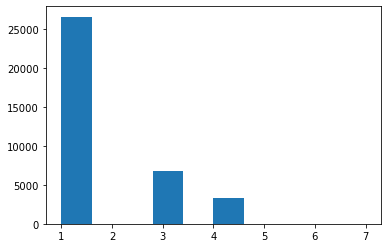

In [45]:
plt.hist(x='point_granularity', data=df)
plt.show()

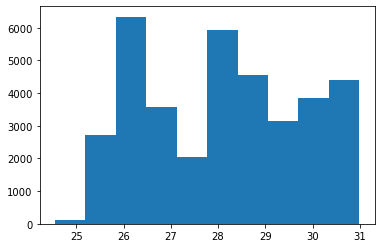

In [46]:
plt.hist(x='point_latitude', data=df)
plt.show()

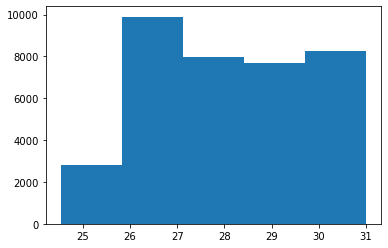

In [47]:
plt.hist(x='point_latitude', data=df,bins=5)
plt.show()

In [15]:
from scipy.stats import ttest_1samp

In [16]:
t_statistic, p_value= ttest_1samp(df['point_latitude'],28)

In [17]:
p_value

3.1799906152680854e-24

 #### A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

In [19]:
from scipy import stats

In [20]:
 from scipy.stats import ttest_rel

In [24]:
# there is no use of paired t test here, this is just a random rxample
t_statistic, p_value = stats.ttest_rel(df['point_latitude'],df['point_longitude'])

In [25]:
p_value

0.0

In [26]:
## p value less than 0.05, thus we will reject the null hypothesis

In [27]:
from scipy.stats import chisquare

In [30]:
 df2= pd.read_csv("C:\\Users\\devesh\\Desktop\\Git Repositories\\Python-Notes\\Statistics for DS\\Book1.csv")

In [31]:
df2.head()

,Event,Observed,Expected
0,Successful,41,33
1,Unsuccessful,59,67


In [32]:
# calculating the t statistics and p-value for chi square test
t_statistic, p_value= chisquare(f_obs=df2['Observed'],f_exp=df2['Expected'])

In [33]:
p_value

0.08887585044058065

here the p value is greater than 0.05 thus we fail to reject the null hypothesis. Thus the observed and Expected Frequencies have no significant difference.

In [34]:
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [36]:
# corelation between point_longitude and point_latitude
df[['point_latitude','point_longitude']].corr()

,point_latitude,point_longitude
point_latitude,1.000000,-0.708585
point_longitude,-0.708585,1.000000


In [37]:
# corelation between point_longitude and point_granularity
df[['point_latitude','point_granularity']].corr()

,point_latitude,point_granularity
point_latitude,1.000000,0.084803
point_granularity,0.084803,1.000000


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
df.corr()     #corelation between all the variables

,policyID,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,point_granularity
policyID,1.000000,-0.005278,-0.010772,-0.005034,-0.005077,-0.010144,-0.009881,0.011715,0.013628,0.002900,-0.001846,-0.003114,0.003450,0.007255
eq_site_limit,-0.005278,1.000000,0.888743,0.983463,0.973441,0.866644,0.786223,0.060976,0.073104,0.000281,-0.000235,-0.001993,0.005551,0.007615
hu_site_limit,-0.010772,0.888743,1.000000,0.883024,0.889365,0.975598,0.941141,0.053287,0.099763,0.007471,0.000197,-0.024579,0.023827,0.003154
fl_site_limit,-0.005034,0.983463,0.883024,1.000000,0.985513,0.863712,0.779331,0.050601,0.054018,0.000446,-0.000214,-0.001327,0.006361,0.009814
fr_site_limit,-0.005077,0.973441,0.889365,0.985513,1.000000,0.873725,0.794160,0.049698,0.082239,-0.000050,0.000570,-0.008160,0.012174,0.007351
tiv_2011,-0.010144,0.866644,0.975598,0.863712,0.873725,1.000000,0.973050,0.051863,0.097008,0.007217,0.000170,-0.023168,0.023830,0.002521
tiv_2012,-0.009881,0.786223,0.941141,0.779331,0.794160,0.973050,1.000000,0.065442,0.106189,0.011547,0.000335,-0.028938,0.028259,-0.000905
eq_site_deductible,0.011715,0.060976,0.053287,0.050601,0.049698,0.051863,0.065442,1.000000,0.501951,-0.000389,-0.000092,0.016045,0.002621,-0.002699
hu_site_deductible,0.013628,0.073104,0.099763,0.054018,0.082239,0.097008,0.106189,0.501951,1.000000,0.009943,0.048686,-0.016270,0.021886,-0.012778
fl_site_deductible,0.002900,0.000281,0.007471,0.000446,-0.000050,0.007217,0.011547,-0.000389,0.009943,1.000000,-0.000134,0.000634,-0.002442,-0.002741


<AxesSubplot:>

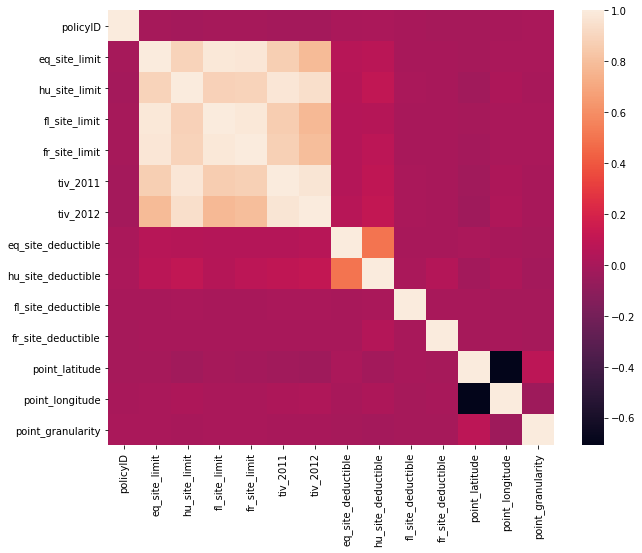

In [42]:
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor)